In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [3]:
# load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# scale the data, since the color codes are in between [0,255]
# if we divide it by 255, the values will be scaled in between 0 and 1
x_train, x_test = x_train/255, x_test/255
print('x_train.shape:', x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
model = tf.keras.models.Sequential([
  # We generally flatten the data ourselves, 
  # but in keras there's a Flatten layer for it. 
  # Also we specify the input shape of the data in Flatten layer
  # which is because its the first layer of model.
  tf.keras.layers.Flatten(input_shape = (28, 28)),

  # We'll have 128 hidden layers, this is a hyperparameter
  # also using relu as activation function
  # since the output of one neuron will be the input for the next neuron
  # we dont need to use something like sigmoid to scale the outputs as 
  # probabilities. 
  # Using ReLU (Rectifier linear unit) is a better choice
  # because it doesn't lead us to vanishing gradient problem
  # Also there's different activation functions such as ELU (Exponential linear unit)
  # and LReLU (Leaky ReLU), LReLU adds very small positive slope for negative inputs
  # negative values in ReLU isn't possible because the gradient for 
  # negative values is 0.
  # also ReLU can't be centered at zero which is kinda bad, 
  # BUT THE RULE OF THIS FIELD IS "IF IT WORKS, DONT TOUCH IT!"
  # So it's not that important if it works good. 
  tf.keras.layers.Dense(128, activation = 'relu'),
  # The dropout layer drop outs random nodes in order to reduce
  # to learn from dominant nodes. Actually it sets these nodes to 0
  # so they doesn't have an influence in other neurons.
  # The number "0.2" means there's 20% chance of dropping a node.
  tf.keras.layers.Dropout(0.2),
  # Since this is the final layer, we'll need the probabilities
  # so we can use softmax activation function to map results as probabilities
  # softmax function is a kinda generalized version of sigmoid
  # we should use sigmoid for binary classification but
  # for multiclass binary classification like this, softmax fits better.
  # Since softmax is a generalized version of sigmoid function, 
  # we can also use softmax function for binary classification problems
  # Also there will be 10 outputs since theres 10 digit
  # [0,9]
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2893 - accuracy: 0.9159 - val_loss: 0.1374 - val_accuracy: 0.9584
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1424 - accuracy: 0.9580 - val_loss: 0.0954 - val_accuracy: 0.9707
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1048 - accuracy: 0.9678 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0860 - accuracy: 0.9735 - val_loss: 0.0749 - val_accuracy: 0.9752
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0726 - accuracy: 0.9769 - val_loss: 0.0773 - val_accuracy: 0.9753
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.0686 - val_accuracy: 0.9778
Epoch 7/10
60000/60000 [==============================] 

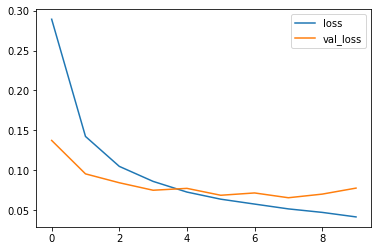

In [7]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

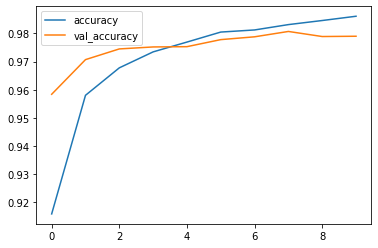

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [9]:
# Evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0776 - accuracy: 0.9790


[0.07758961810831388, 0.979]

Confusion matrix, without normalization
[[ 963    0    2    0    1    1    9    1    2    1]
 [   0 1124    4    0    0    0    4    0    3    0]
 [   0    2 1011    1    2    0    4    8    4    0]
 [   0    0    3  979    0   14    0    6    5    3]
 [   0    1    5    1  962    0    2    2    2    7]
 [   2    0    0    2    3  873    4    1    5    2]
 [   2    3    0    1    3    4  944    0    1    0]
 [   1    5    9    1    0    0    0 1003    2    7]
 [   4    1    2    2    4    2    3    6  945    5]
 [   0    3    0    2    8    1    1    8    0  986]]


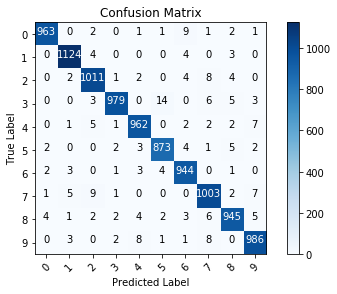

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Text(0.5, 1.0, 'True label: 2 Predicted 7')

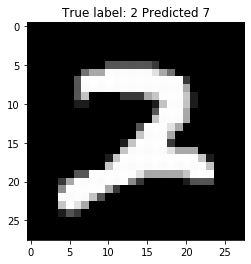

In [25]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted %s' % (y_test[i], p_test[i]))